In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

<h1>Q 1.1</h1>

In [90]:
# Create TC matrix

n = 240
AV = np.array([0,20,0,0,0,0])
IV = np.array([30,45,60,40,40,40])
DO = np.array([15,20,25,15,20,25])

TC = np.array([([0] * AV[i] + (([1] * DO[i] + [0] * (IV[i] - DO[i])) * int(n/IV[i])))[0:240] for i in range(6)], \
              dtype = 'object')

# Standardize

for i in range(6):
    TC[i] = (TC[i] - np.mean(TC[i]))/np.std(TC[i])

TC = TC.astype(float)

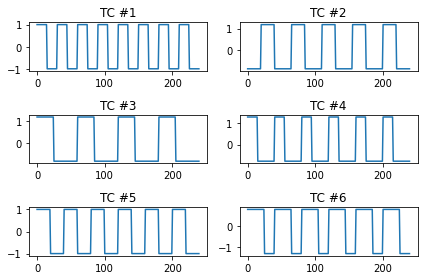

In [91]:
# Plot each TC.

fig, axis = plt.subplots(3, 2)

for i in range(6):
    axis[int(i/2), i%2].plot(range(240), TC[i])
    axis[int(i/2), i%2].set_title("TC #" + str(i + 1))
    
fig.tight_layout()
plt.show()

<h1>Q 1.2</h1>

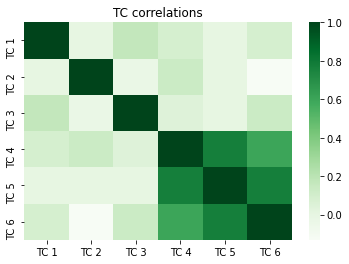

In [92]:
# Visualise correlations.

labels = ["TC " + str(i) for i in range(1, 7)]

corr = np.corrcoef(TC)
fig = sns.heatmap(corr, cmap = 'Greens', xticklabels = labels, yticklabels = labels)
fig.set_title("TC correlations")
plt.show()

<h1>Q 1.3</h1>

In [93]:
# Construct tmpSM.

tmp1 = np.zeros((21, 21))
tmp1[1:6, 1:6] = 1

tmp2 = np.zeros((21, 21))
tmp2[1:6, 14:19] = 1

tmp3 = np.zeros((21, 21))
tmp3[7:13, 1:6] = 1

tmp4 = np.zeros((21, 21))
tmp4[7:13, 14:19] = 1

tmp5 = np.zeros((21, 21))
tmp5[14:19, 1:6] =1

tmp6 = np.zeros((21, 21))
tmp6[14:19, 14:19] = 1

tmpSM = np.array([tmp1, tmp2, tmp3, tmp4, tmp5, tmp6])

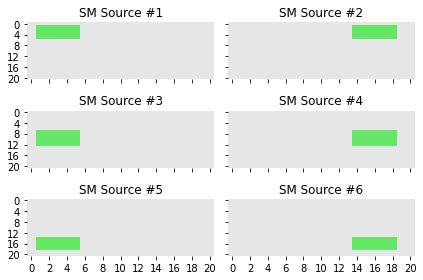

In [94]:
# Plot tmpSM sources.

colors = ((0.9, 0.9, 0.9), (0.4, 0.9, 0.4))
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
fig, axis = plt.subplots(3, 2, sharex = "col", sharey = "row")

for i in range(6):    
    sns.heatmap(tmpSM[i], cmap = cmap, ax = axis[int(i/2)][i%2], cbar = False)
    axis[int(i/2), i%2].set_title("SM Source #" + str(i + 1))
    

fig.tight_layout()
plt.show()


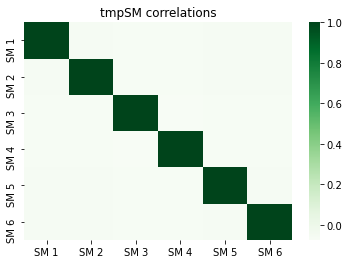

In [95]:
# Plot tmpSMs correlations.

SM = np.reshape(tmpSM, (6, 441))

corr = np.corrcoef(SM)
labels = ["SM " + str(i) for i in range(1, 7)]
fig = sns.heatmap(corr, cmap = 'Greens', xticklabels = labels, yticklabels = labels)
fig.set_title("tmpSM correlations")
plt.show()

<h1>Q 1.4</h1>

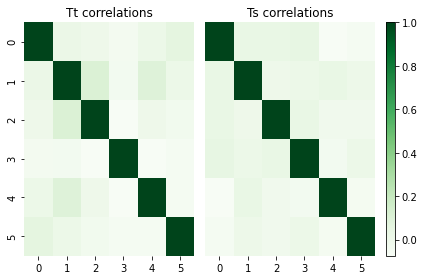

In [96]:
# Construct Tt and Ts
np.random.seed(1)
Tt = np.random.normal(scale = np.sqrt(0.25), size = (6, 240))
Ts = np.random.normal(scale = np.sqrt(0.015), size = (6, 441))

# Plot correlations

Ttcorr = np.corrcoef(Tt)
Tscorr = np.corrcoef(Ts)

fig, axis = plt.subplots(1, 3, gridspec_kw=dict(width_ratios=[1,1,0.05]))
sns.heatmap(Ttcorr, cmap = "Greens", ax = axis[0], cbar = False)
axis[0].set_title("Tt correlations")
sns.heatmap(Tscorr, cmap = "Greens", ax = axis[1], cbar = False, yticklabels = False)
axis[1].set_title("Ts correlations")
fig.colorbar(axis[1].collections[0], cax=axis[2])
fig.tight_layout()

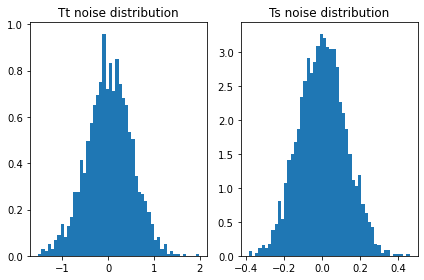

In [97]:
# Plot distributions of Tt and Ts

fig, axis = plt.subplots(1, 2)
axis[0].hist(Tt.flatten(), bins = 50, density = True, stacked = True)
axis[0].set_title("Tt noise distribution")
axis[1].hist(Ts.flatten(), bins = 50, density = True, stacked = True)
axis[1].set_title("Ts noise distribution")
fig.tight_layout()
fig.show()

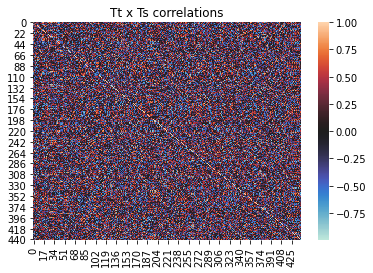

In [98]:
# Correlation of Tt x Ts

TtTs = Tt.T @ Ts
TtTs.shape

TtTscorr = np.corrcoef(TtTs.T)
sns.heatmap(TtTscorr, cmap = "icefire")
plt.title("Tt x Ts correlations")
plt.show()

<h1>Q 1.5</h1>

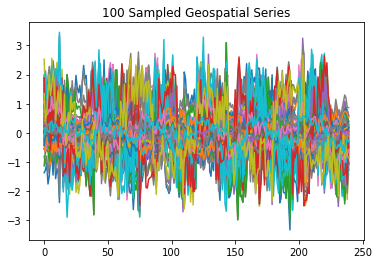

In [99]:
# Generate X = (TC + Tt) * (SM + Ts)

X = np.add(TC.T, Tt.T) @ np.add(SM, Ts)

# Take sample subset
np.random.seed(1)
samples = np.random.randint(441, size=100)
Xsample = X[:, samples]

# Plot the sampled series
plt.plot(Xsample)
plt.title("100 Sampled Geospatial Series")
plt.show()

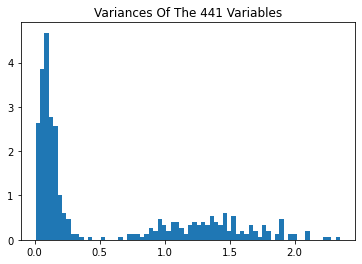

In [100]:
# Plot variance of samples

Vars = np.var(X, axis = 0)
plt.hist(Vars, bins = 70, density = True, stacked = True)
plt.title("Variances Of The 441 Variables")
plt.show()

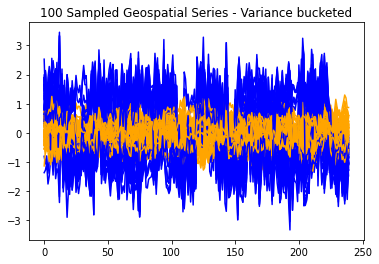

In [101]:
# Re-visualize the sample series with colour-coded variances.

for i in range(100):
    plt.plot(Xsample.T[i], color = "blue" if Vars[samples][i] > 0.5 else "orange")

plt.title("100 Sampled Geospatial Series - Variance bucketed")
plt.show()

In [102]:
# Standardize X

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

<h1>Q 2.1</h1>
Estimate LSR of $A_{LSR} = (D^TD)^{-1}D^TX$, where $D = TC$

Also estimate LSR of $D_{LSR} = XA_{LSR}^T$

In [103]:
TC = TC.T

In [104]:
# Create LSR estimates.

Alsr = np.linalg.inv(TC.T @ TC) @ TC.T @ X
Dlsr = X @ Alsr.T
Alsr = Alsr.reshape(6, 21, 21)

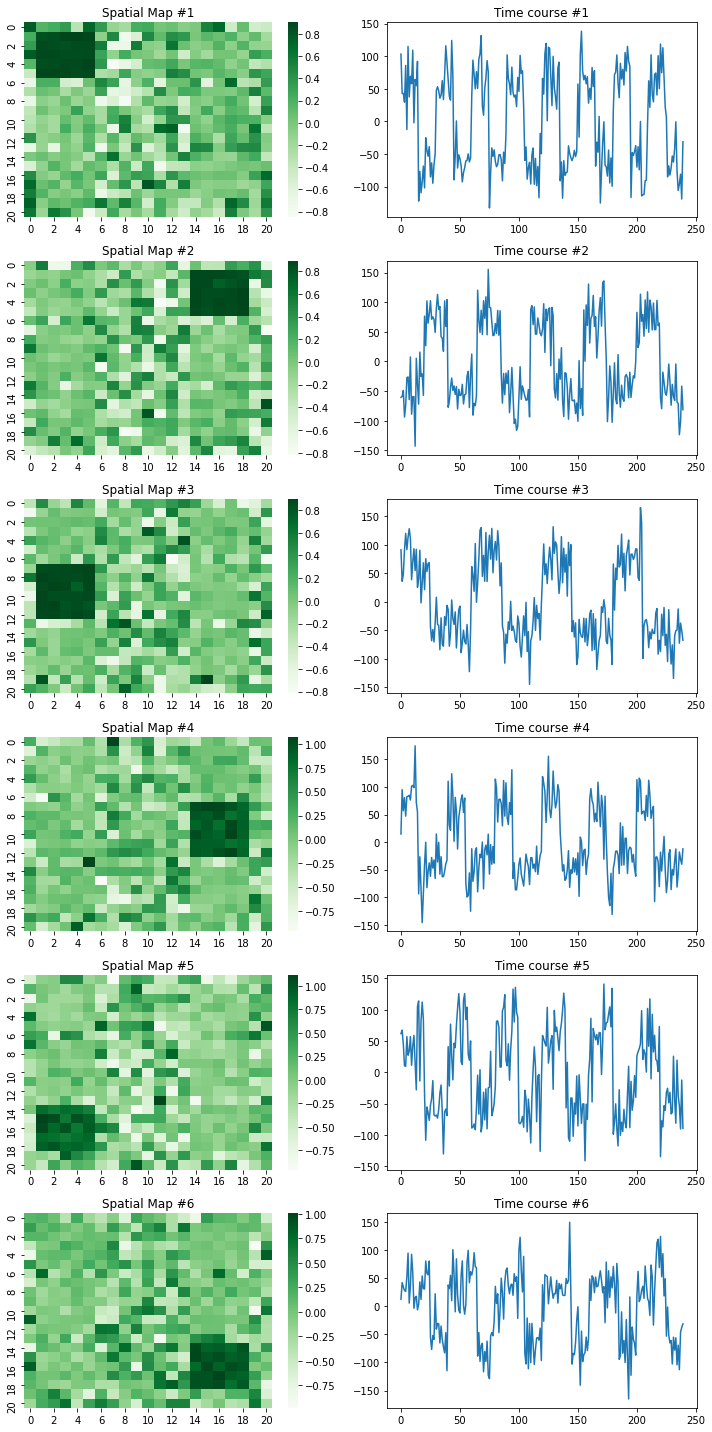

In [109]:
# Plot spatial estimates with corresponding time estimates.

fig, axis = plt.subplots(6, 2, figsize = (10, 20))

for i in range(6):    
    sns.heatmap(Alsr[i], cmap = "Greens", ax = axis[i][0])
    axis[i, 0].set_title("Spatial Map #" + str(i + 1))
    axis[i][1].plot(Dlsr[:, i])
    axis[i][1].set_title("Time course #" + str(i + 1))

fig.tight_layout()

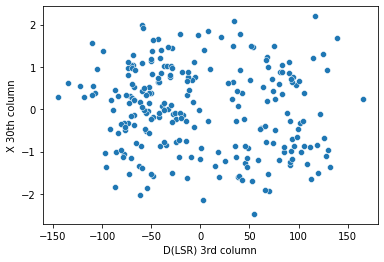

In [107]:
# Compare a pair of location data between real and estimate.

fig = sns.scatterplot(x = Dlsr[:, 2], y = X[:, 29])
fig.set_xlabel("D(LSR) 3rd column")
fig.set_ylabel("X 30th column")
plt.show()

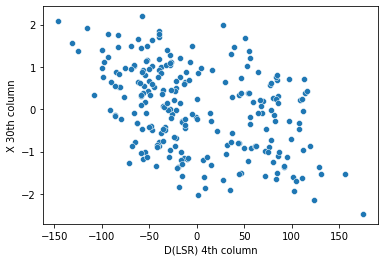

In [108]:
# Compare a pair of location data between real and estimate.

fig = sns.scatterplot(x = Dlsr[:, 3], y = X[:, 29])
fig.set_xlabel("D(LSR) 4th column")
fig.set_ylabel("X 30th column")
plt.show()